<a href="https://colab.research.google.com/github/WillianMachado95/Analise_VendasCarros/blob/main/VendasCarros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Definição do Problema de Negócio

**1.1. Contexto**

Você é Analista de Dados na empresa XYZ Corporation International, uma revendedora de automóveis de luxo com sede em São Paulo. A empresa começou sua operação no  Brasil em 2016 e atua nos quatro estados da região sudeste, mais os estados do Paraná  e Bahia. Seu gerente vai apresentar os resultados da equipe comercial para o novo CEO  da empresa e precisa da sua ajuda para construir um Dashboard que represente os dados de vendas no período de 2016 a 2019.


**1.2. Objetivos do Projeto**

O objetivo principal deste projeto é transformar os dados brutos de vendas em um ativo confiável e acionável, permitindo que a empresa baseie suas decisões estratégicas em informações precisas.

Para alcançar este objetivo, os seguintes passos serão executados:

Limpeza e Validação: Implementar um processo para identificar e corrigir as inconsistências nos dados, tratando valores ausentes, removendo duplicatas, corrigindo tipos de dados e lidando com outliers.

Análise Exploratória de Dados (EDA): Analisar o conjunto de dados limpo para extrair insights iniciais e responder às perguntas de negócio fundamentais.

Geração de Insights Visuais: Criar um conjunto de visualizações (Gráficos) que comuniquem de forma clara e objetiva os principais indicadores de desempenho de vendas.


**1.3. Critérios de Sucesso**

O projeto será considerado um sucesso quando formos capazes de entregar:

Um conjunto de dados (dataset) limpo e validado, pronto para ser utilizado em análises futuras.

Um relatório de análise respondendo com clareza às seguintes questões:

1. Faturamento e Lucro total
2. Faturamento e Lucro total por ano
2. Quantas vendas foram realizadas
3. Quantos clientes foram atendidos
4. Custo total do Veículo Por Fabricante
5. Faturamento Por Estado
6. Top 5 modelos mais vendidos em termos de quantidade
7. Quantidade vendida por cor


## 2. Importação das Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Configurando o estilo dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 3. Leitura dos Dados

In [ ]:
df = pd.read_excel("Base_VendasCarros.xlsx")

print("Dados Carregados. Dimensão:", df.shape)

Dados Carregados. Dimensão: (464, 10)


In [ ]:
df.head()

,DataNotaFiscal,Fabricante,Estado,ValorVenda,CustoEntrega,CustoMaoDeObra,NomeCliente,Modelo,Cor,Ano
0,2018-12-04,Aston Martin,São Paulo,97750.0,1475.0,570.0,Cut'n'Shut,Rapide,Preto,2017.0
1,2018-12-04,Aston Martin,Rio de Janeiro,97750.0,1400.0,570.0,BritWheels,DB9,Preto,2017.0
2,2016-12-04,Aston Martin,São Paulo,95000.0,1500.0,570.0,Bright Orange,Rapide,Preto,2015.0
3,2018-11-04,Aston Martin,Minas Gerais,71250.0,1475.0,750.0,Les Arnaqueurs,DB4,Azul,2017.0
4,2018-11-04,Aston Martin,Rio de Janeiro,71250.0,1400.0,750.0,Tweedy Wheels,DB9,Azul,2017.0


In [ ]:
# Verificando as informações gerais do DataFrame
print("\n--- Informações Gerais do DataFrame (df_vendas.info()) ---\n")
df.info()


--- Informações Gerais do DataFrame (df_vendas.info()) ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DataNotaFiscal  462 non-null    datetime64[ns]
 1   Fabricante      462 non-null    object        
 2   Estado          462 non-null    object        
 3   ValorVenda      462 non-null    float64       
 4   CustoEntrega    462 non-null    float64       
 5   CustoMaoDeObra  458 non-null    float64       
 6   NomeCliente     460 non-null    object        
 7   Modelo          462 non-null    object        
 8   Cor             462 non-null    object        
 9   Ano             462 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 36.4+ KB


## Passo 4 - Análise Exploratória de Dados (EDA)

Antes de fazer qualquer modificação vamos inspecionar o DataFrame para entender sua estrutura e identificar os problemas.

In [ ]:
#Verificando valores ausentes

print("\n--- Verificando valores ausentes ---\n")
print(df.isna().sum())


--- Verificando valores ausentes ---

DataNotaFiscal    2
Fabricante        2
Estado            2
ValorVenda        2
CustoEntrega      2
CustoMaoDeObra    6
NomeCliente       4
Modelo            2
Cor               2
Ano               2
dtype: int64


In [ ]:
# Verificando a existencia de duplicatas

print("\n--- Verificando a presença de registros duplicados ---\n")
print(f"Número de linhas duplicadas: {df.duplicated().sum()}")


--- Verificando a presença de registros duplicados ---

Número de linhas duplicadas: 6


In [ ]:
print("\n--- Estatísticas descritivas para colunas numéricas ---\n")
# Usamos o describe() para ter uma noção inicial.
print(df.describe())


--- Estatísticas descritivas para colunas numéricas ---

                      DataNotaFiscal      ValorVenda  CustoEntrega  \
count                            462      462.000000    462.000000   
mean   2018-07-13 16:03:07.012986880    75653.961039    527.857143   
min              2016-01-01 00:00:00    22500.000000    -75.000000   
25%              2017-08-02 00:00:00    39500.000000     50.000000   
50%              2018-12-02 12:00:00    44000.000000    425.000000   
75%              2019-06-02 00:00:00   110000.000000    875.000000   
max              2019-12-02 00:00:00  1000000.000000   1750.000000   
std                              NaN    87449.260522    525.743000   

       CustoMaoDeObra          Ano  
count      458.000000   462.000000  
mean       683.078603  2017.872294  
min        147.000000  2015.000000  
25%        325.000000  2017.000000  
50%        654.000000  2018.000000  
75%        987.000000  2019.000000  
max       1250.000000  2019.000000  
std        345.

In [ ]:
print("\n--- Estatísticas descritivas para colunas categóricas ---\n")
print(df.describe(include = [object]))


--- Estatísticas descritivas para colunas categóricas ---

       Fabricante     Estado  NomeCliente Modelo    Cor
count         462        462          460    462    462
unique          7          6           31     27      6
top        Jaguar  São Paulo  Wheels'R'Us     XK  Prata
freq          129        218           39     95    129


# Passo 5 - Limpeza e Pré-Processamento dos Dados

In [ ]:
# Copiando o DataFrame para manter o original intacto
df_limpo = df.copy()

In [ ]:
# 3.1. Removendo Linhas Completamente em Branco
# Isso remove qualquer linha onde todos os valores são NaN
df_limpo.dropna(how='all', inplace=True)
print(f"\nLinhas após remover completamente em branco: {df.shape[0]}")


Linhas após remover completamente em branco: 464


In [ ]:
df_limpo.isna().sum()

,0
DataNotaFiscal,0
Fabricante,0
Estado,0
ValorVenda,0
CustoEntrega,0
CustoMaoDeObra,4
NomeCliente,2
Modelo,0
Cor,0
Ano,0


In [ ]:
print("\n--- Verificando valores ausentes ---\n")
print(df_limpo.isna().sum())


--- Verificando valores ausentes ---

DataNotaFiscal    0
Fabricante        0
Estado            0
ValorVenda        0
CustoEntrega      0
CustoMaoDeObra    4
NomeCliente       2
Modelo            0
Cor               0
Ano               0
dtype: int64


In [ ]:
# Custo Mão de Obra (Preenchimento pela Média do Fabricante)

# Calcula a média do CustoMaoDeObra agrupado por Fabricante
media_por_fabricante = df_limpo.groupby('Fabricante')['CustoMaoDeObra'].transform('mean')

# Preenche os valores ausentes com a média do respectivo Fabricante
df_limpo['CustoMaoDeObra'].fillna(media_por_fabricante, inplace=True)

/tmp/ipython-input-1877008509.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpo['CustoMaoDeObra'].fillna(media_por_fabricante, inplace=True)


In [ ]:
# Removendo linhas onde o cliente está vazio
df_limpo = df_limpo.dropna(subset=['NomeCliente'])

In [ ]:
print("\n--- Verificando valores ausentes ---\n")
print(df_limpo.isna().sum())


--- Verificando valores ausentes ---

DataNotaFiscal    0
Fabricante        0
Estado            0
ValorVenda        0
CustoEntrega      0
CustoMaoDeObra    0
NomeCliente       0
Modelo            0
Cor               0
Ano               0
dtype: int64


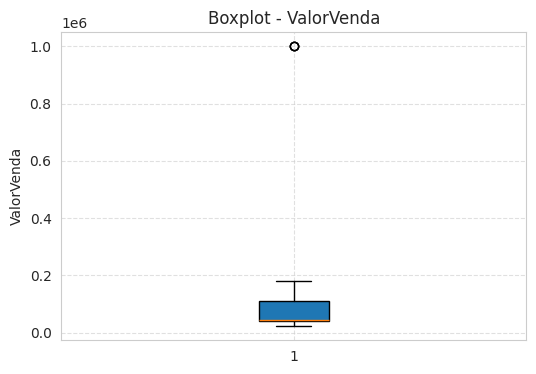

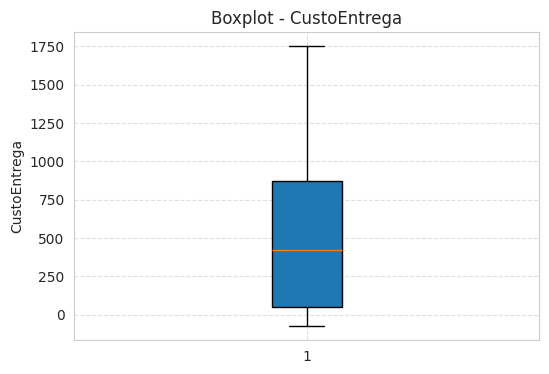

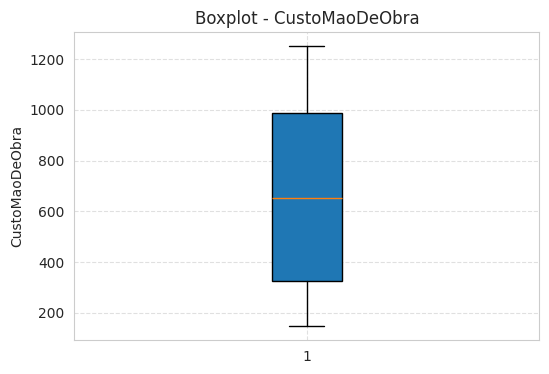

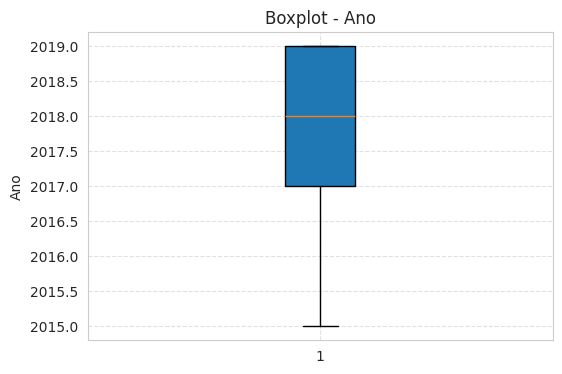

In [ ]:

# Seleciona apenas as colunas numéricas
numeric_cols = df_limpo.select_dtypes(include='number').columns

# Cria um boxplot para cada coluna numérica
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df_limpo[col].dropna(), vert=True, patch_artist=True)
    plt.title(f'Boxplot - {col}')
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

In [ ]:
# Vamos remover valores de 'Quantidade' que estão muito distantes da média.
# Uma abordagem comum é remover valores que estão além de 3 desvios padrão da média.

limite_superior = df_limpo['ValorVenda'].mean() + 3 * df_limpo['ValorVenda'].std()
df_limpo = df_limpo[df_limpo['ValorVenda'] < limite_superior]

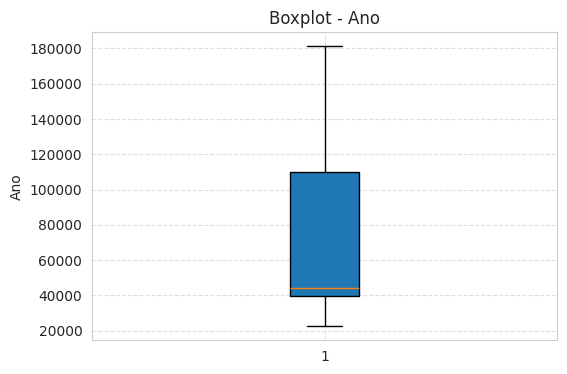

In [ ]:
# Boxplot da coluna de ValorVenda

plt.figure(figsize=(6, 4))
plt.boxplot(df_limpo['ValorVenda'].dropna(), vert=True, patch_artist=True)
plt.title(f'Boxplot - {col}')
plt.ylabel(col)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
#Corrrigindo os valores negativos

df_limpo['CustoEntrega'] = df_limpo['CustoEntrega'].abs()

# Passo 4 - Engenharia de Atributos (Feature Engineering) e Extração de Insights

In [ ]:
# Engenharia de Atributos: Cálculo de Custo Total e Lucro
# CustoTotal = CustoEntrega + CustoMaoDeObra
# Lucro = ValorVenda - CustoTotal.

df_limpo['CustoTotal'] = df_limpo['CustoEntrega'] + df_limpo['CustoMaoDeObra']
df_limpo['Lucro'] = df_limpo['ValorVenda'] - df_limpo['CustoTotal']



In [ ]:

# Conversão de Tipos e Extração de Ano de Venda
# Converte a coluna de data e extrai o ano da venda
df_limpo['DataNotaFiscal'] = pd.to_datetime(df['DataNotaFiscal'])
df_limpo['Ano_Venda'] = df_limpo['DataNotaFiscal'].dt.year


In [ ]:
df_limpo

,DataNotaFiscal,Fabricante,Estado,ValorVenda,CustoEntrega,CustoMaoDeObra,NomeCliente,Modelo,Cor,Ano,CustoTotal,Lucro,Ano_Venda
0,2018-12-04,Aston Martin,São Paulo,97750.0,1475.0,570.0,Cut'n'Shut,Rapide,Preto,2017.0,2045.0,95705.0,2018
1,2018-12-04,Aston Martin,Rio de Janeiro,97750.0,1400.0,570.0,BritWheels,DB9,Preto,2017.0,1970.0,95780.0,2018
2,2016-12-04,Aston Martin,São Paulo,95000.0,1500.0,570.0,Bright Orange,Rapide,Preto,2015.0,2070.0,92930.0,2016
3,2018-11-04,Aston Martin,Minas Gerais,71250.0,1475.0,750.0,Les Arnaqueurs,DB4,Azul,2017.0,2225.0,69025.0,2018
4,2018-11-04,Aston Martin,Rio de Janeiro,71250.0,1400.0,750.0,Tweedy Wheels,DB9,Azul,2017.0,2150.0,69100.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,2016-08-04,Aston Martin,São Paulo,130000.0,1000.0,750.0,Aldo Motors,DB9,Azul,2016.0,1750.0,128250.0,2016
460,2017-02-02,Rolls Royce,São Paulo,178500.0,1750.0,654.0,Wheels'R'Us,Wraith,Prata,2017.0,2404.0,176096.0,2017
461,2017-12-02,Rolls Royce,São Paulo,178500.0,1750.0,654.0,Wheels'R'Us,Phantom,Verde,2017.0,2404.0,176096.0,2017
462,2017-06-02,Aston Martin,São Paulo,178500.0,450.0,654.0,Honest John,Vanquish,Prata,2017.0,1104.0,177396.0,2017


**Qual é o Faturamento e Lucro total?**

In [ ]:
total_vendas_geral = df_limpo['ValorVenda'].sum()
custo_geral = df_limpo['CustoTotal'].sum()
total_lucro_geral = df_limpo['Lucro'].sum()

print("Total de Vendas (ValorVenda) e Lucro")
print(f"Total de Vendas (Geral): R$ {total_vendas_geral:,.2f}")
print(f'Total de custo (geral): R$ {custo_geral:,.2f}')
print(f"Total de Lucro (Geral):  R$ {total_lucro_geral:,.2f}")

Total de Vendas (ValorVenda) e Lucro
Total de Vendas (Geral): R$ 31,882,880.00
Total de custo (geral): R$ 559,470.59
Total de Lucro (Geral):  R$ 31,323,409.41


**Qual é o Faturamento e Lucro total por ano?**

In [ ]:
vendas_por_ano = df_limpo.groupby('Ano_Venda').agg(
    Total_Vendas=('ValorVenda', 'sum'),
    Total_Lucro=('Lucro', 'sum')
).reset_index()
print("\nTotal de Vendas e Lucro Por Ano:")
print(vendas_por_ano.to_string(index=False, float_format="R$ {:,.2f}".format))


Total de Vendas e Lucro Por Ano:
 Ano_Venda     Total_Vendas      Total_Lucro
      2016  R$ 3,172,500.00  R$ 3,107,602.00
      2017  R$ 7,309,210.00  R$ 7,180,483.61
      2018  R$ 6,437,440.00  R$ 6,312,325.18
      2019 R$ 14,963,730.00 R$ 14,722,998.61


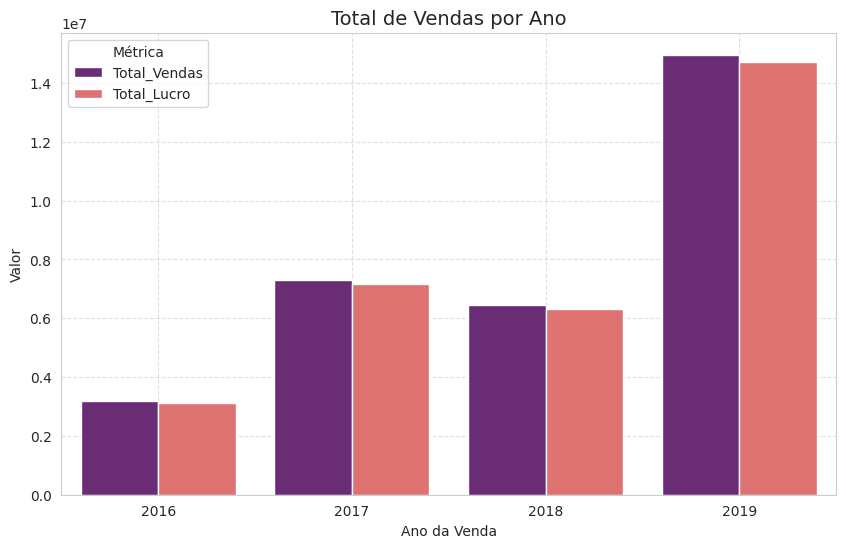

In [ ]:
# Gráfico 1

plt.figure(figsize=(10, 6))

# --- Transforma o DataFrame para formato longo ---
df_long = vendas_por_ano.melt(
    id_vars='Ano_Venda',
    value_vars=['Total_Vendas', 'Total_Lucro'],
    var_name='Métrica',
    value_name='Valor'
)

sns.barplot(data=df_long, x='Ano_Venda', y='Valor', hue='Métrica', palette='magma')

plt.title('Total de Vendas por Ano', fontsize=14)
#plt.ylabel('Total de Vendas (R$)')
plt.xlabel('Ano da Venda')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Quantas vendas foram realizadas?**

In [ ]:
total_transacoes = df_limpo.shape[0]
print(f"Total de Transações (Vendas): {total_transacoes}")

Total de Transações (Vendas): 457


**Quantos clientes foram atendidos?**

In [ ]:
# Contamos os valores únicos, excluindo o 'Cliente Não Identificado' se for o caso,
# mas para ter o total de clientes *atendidos*, contamos os únicos no dataset.

total_clientes = df_limpo['NomeCliente'].nunique()
print(f"Total de Clientes Únicos Atendidos: {total_clientes}")

Total de Clientes Únicos Atendidos: 31


**Qual é o Custo total do Veículo Por Fabricante?**


In [ ]:
custo_por_fabricante = df_limpo.groupby('Fabricante')['CustoTotal'].sum().sort_values(ascending=False)
custo_por_fabricante = custo_por_fabricante.reset_index()

print(f"\n Custo Total (Entrega + Mão de Obra) Por Fabricante ")
print(custo_por_fabricante.to_string(float_format="R$ {:,.2f}".format))



 Custo Total (Entrega + Mão de Obra) Por Fabricante 
     Fabricante    CustoTotal
0  Aston Martin R$ 192,925.82
1        Jaguar R$ 122,329.77
2   Rolls Royce R$ 110,540.00
3       Bentley R$ 101,175.00
4       Triumph  R$ 13,750.00
5           MGB  R$ 13,625.00
6           TVR   R$ 5,125.00


/tmp/ipython-input-3843402791.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = custo_por_fabricante, x='CustoTotal', y='Fabricante', palette='magma')


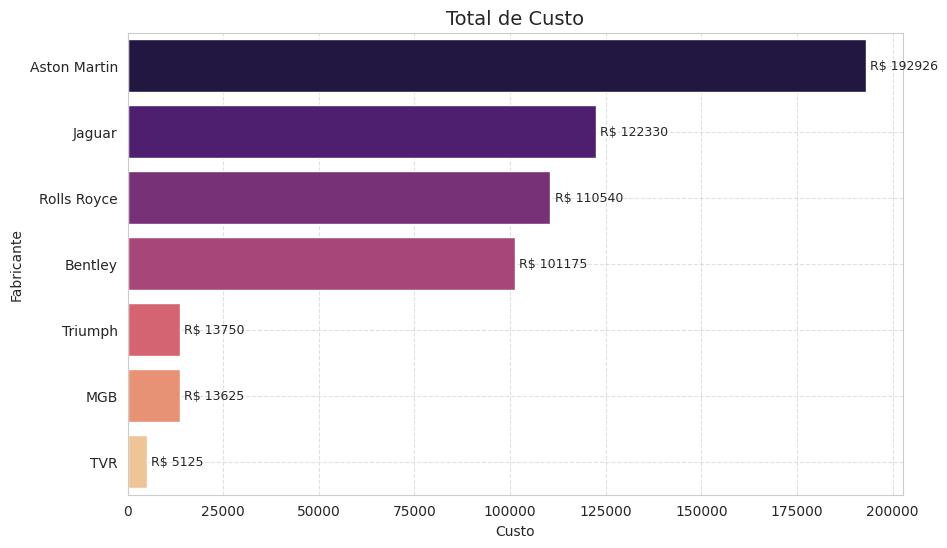

In [ ]:
# Gráfico 2

plt.figure(figsize=(10, 6))

ax = sns.barplot(data = custo_por_fabricante, x='CustoTotal', y='Fabricante', palette='magma')

plt.title('Total de Custo', fontsize=14)
plt.ylabel('Fabricante')
plt.xlabel('Custo')
plt.grid(True, linestyle='--', alpha=0.6)
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='R$ %.f',
        label_type='edge',
        padding=3,
        fontsize=9
    )
plt.show()

**Qual é o faturamento Por Estado?**

In [ ]:
vendas_por_estado = df.groupby('Estado')['ValorVenda'].sum().sort_values(ascending=False)
vendas_por_estado = vendas_por_estado.reset_index()

print(f"\n--- 5. Total de Vendas (ValorVenda) Por Estado ---")
print(vendas_por_estado.to_string(float_format="R$ {:,.2f}".format))

In [ ]:
# Gráfico 3

plt.figure(figsize=(10, 6))

ax = sns.barplot(data = vendas_por_estado, x='ValorVenda', y='Estado', palette='magma')

plt.title('Faturamento total', fontsize=14)
plt.ylabel('Estado')
plt.xlabel('Custo')
plt.grid(True, linestyle='--', alpha=0.6)

for container in ax.containers:
    ax.bar_label(
        container,
        fmt='R$ %.f',
        label_type='edge',
        padding=3,
        fontsize=9
    )

plt.show()

**Qual é o Top 5 modelos mais vendidos em termos de quantidade?**

In [ ]:

top_5_modelos = df['Modelo'].value_counts().head(5)
top_5_modelos = top_5_modelos.reset_index()
top_5_modelos.columns = ['Modelo', 'Quantidade']

print(f"\n--- 6. Top 5 Modelos Mais Vendidos (Quantidade) ---")
print(top_5_modelos.to_string())

In [ ]:
# Gráfico 4

plt.figure(figsize=(10, 6))

ax = sns.barplot(data = top_5_modelos, x='Modelo', y='Quantidade', palette='magma')

plt.title('Top 5 Modelos mais vendidos', fontsize=14)
plt.ylabel('Quantidade')
plt.xlabel('Modelos')
plt.grid(True, linestyle='--', alpha=0.6)
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.f',
        label_type='edge',
        padding=3,
        fontsize=9
    )
plt.show()

**Qual é a quantidade vendida por cor?**

In [ ]:
vendas_por_cor = df['Cor'].value_counts().sort_values(ascending=False).reset_index()
vendas_por_cor.columns = ['Cor', 'Quantidade']

print(f"\n Quantidade Vendida Por Cor \n")
print(vendas_por_cor.to_string())


In [ ]:
# Gráfico 5

plt.figure(figsize=(10, 6))

ax = sns.barplot(data = vendas_por_cor, x='Quantidade', y='Cor', palette='magma')

plt.title('Quantidade vendida por cor', fontsize=14)
plt.ylabel('Cor')
plt.xlabel('Quantidade')
plt.grid(True, linestyle='--', alpha=0.6)
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.f',
        label_type='edge',
        padding=3,
        fontsize=9
    )
plt.show()